In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\dell\Downloads\iris_modified.csv")

In [3]:
df=data.copy()

In [4]:
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
95,95,5.7,3.0,4.2,1.2,versicolor
96,96,5.7,2.9,4.2,1.3,versicolor
97,97,6.2,2.9,4.3,1.3,versicolor
98,98,5.1,2.5,3.0,1.1,versicolor


In [5]:
df.shape

(100, 6)

#### dataset has 100 datapoints and 6 variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   sepal_length  100 non-null    float64
 2   sepal_width   100 non-null    float64
 3   petal_length  100 non-null    float64
 4   petal_width   100 non-null    float64
 5   species       100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


#### dataset has no null values

In [7]:
# dropping the unwanted column

df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [9]:
# displaying the statistical summary

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [10]:
# calculating the count of each species

df['species'].value_counts()

setosa        50
versicolor    50
Name: species, dtype: int64

#### we can see that setosa and versicolor are equally distributed
#### hence it is a balanced data

#### No data cleaning needed as there are no missing values

# EDA

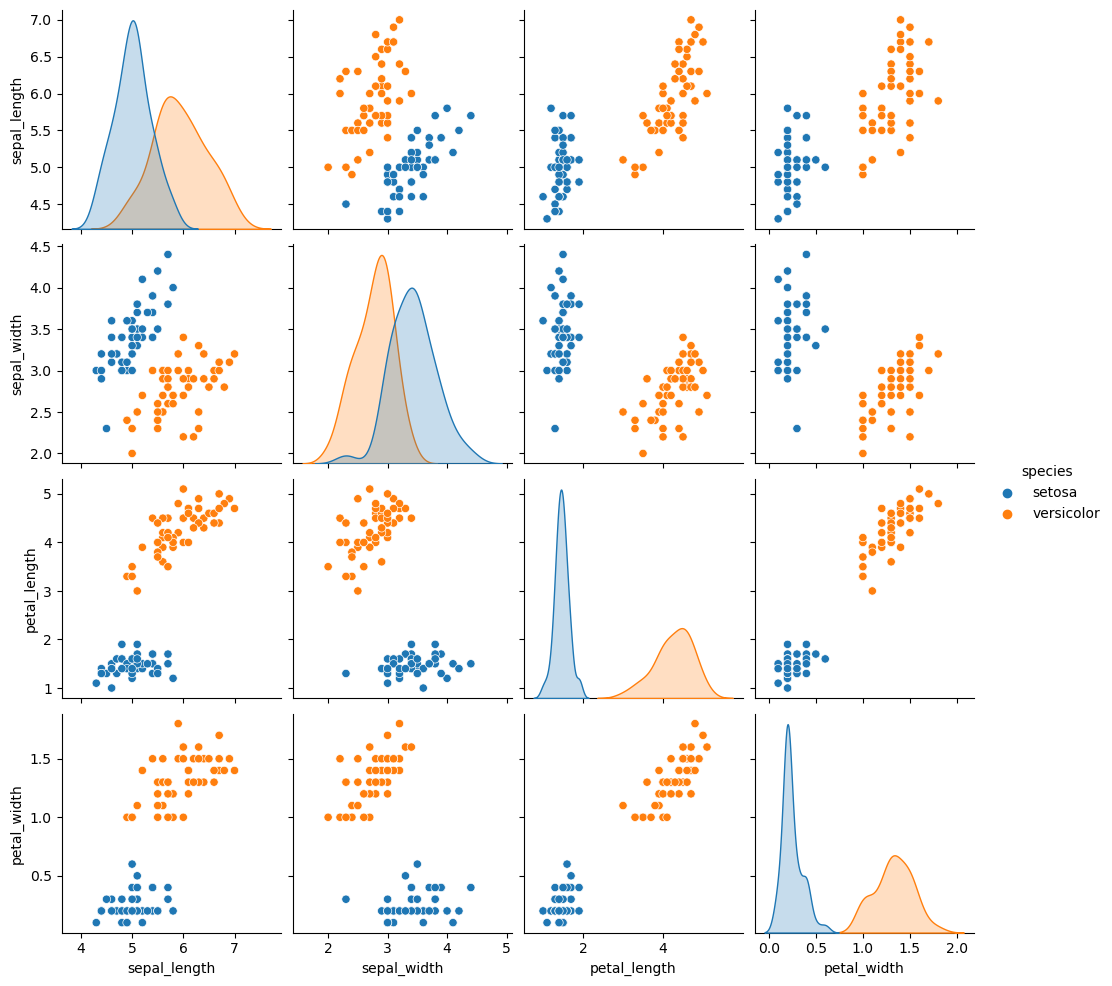

In [11]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='species')
plt.show()

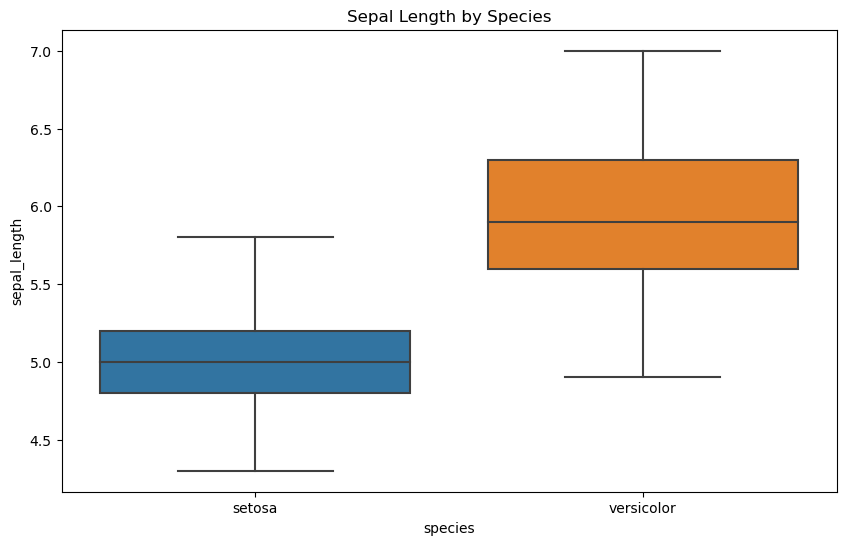

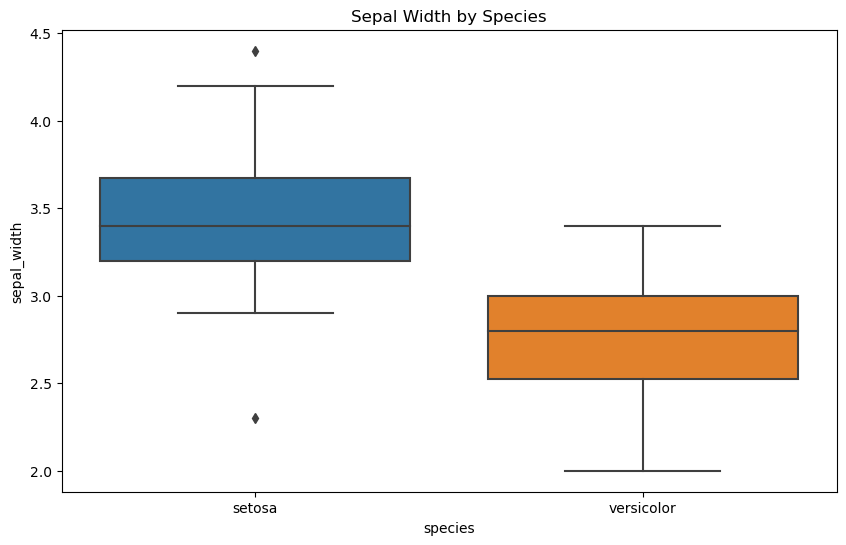

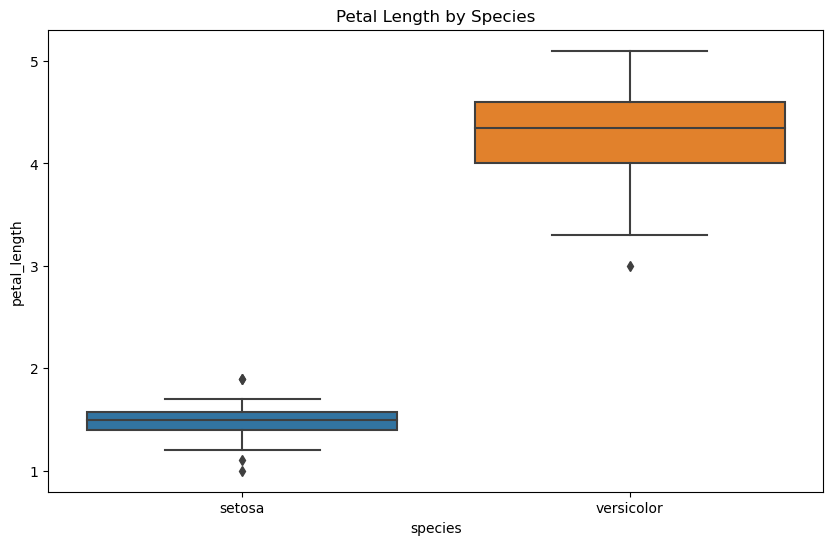

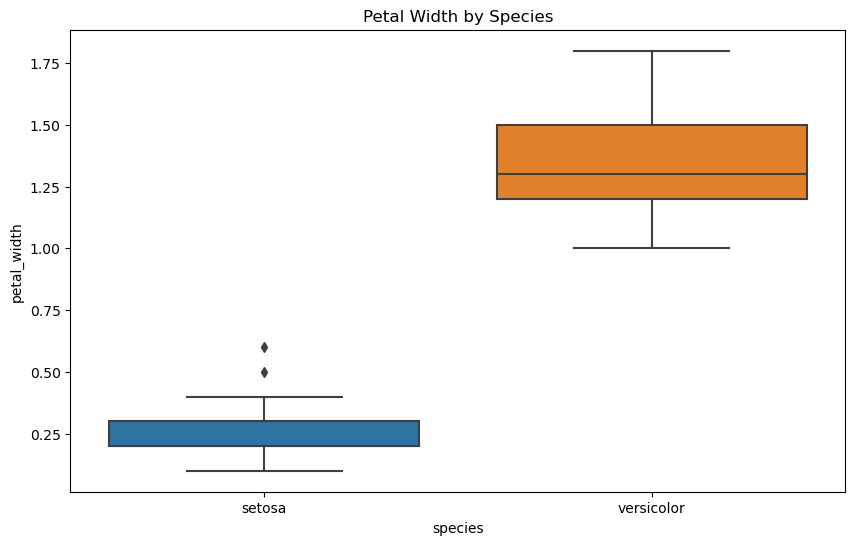

In [12]:
# Boxplot for each feature by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length by Species')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Sepal Width by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Petal Width by Species')
plt.show()

# Feature selection based on EDA

In [13]:

selected_features = ['petal_length', 'petal_width']

df_selected = df[selected_features]

print("Selected Features:", selected_features)
print(df_selected.head())


Selected Features: ['petal_length', 'petal_width']
   petal_length  petal_width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2


##### After performing EDA we can see that "petal_length" and "petal_width" as our features

# Implementing Perceptronic Trick

In [14]:
# Perceptronic trick without using Oops concpet

In [15]:
# Converting species into numerical values
df['species'] = [1 if species == 'setosa' else -1 for species in df['species']]

# Randomly Shuffling the data
np.random.shuffle(df['species'])
np.random.shuffle(df['sepal_length'])
np.random.shuffle(df['sepal_width'])
np.random.shuffle(df['petal_length'])
np.random.shuffle(df['petal_width'])

# Extracting features and labels
X = np.array([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']]).T
y = np.array(df['species'])

# Initializing weights and bias
weights = np.zeros(X.shape[1])
bias = 0

# Applying Perceptronic trick
learning_rate = 0.1
epochs = 100

for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Prediction
        y_pred = np.dot(X[i], weights) + bias
        
        # Updating weights and bias if misclassified
        if y[i] * y_pred <= 0:
            weights += learning_rate * y[i] * X[i]
            bias += learning_rate * y[i]


C:\Users\dell\AppData\Local\Temp\ipykernel_16596\1263512953.py:5: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(df['species'])
C:\Users\dell\AppData\Local\Temp\ipykernel_16596\1263512953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  np.random.shuffle(df['species'])
C:\Users\dell\AppData\Local\Temp\ipykernel_16596\1263512953.py:6: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(df['sepal_len

In [16]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [ 0.14 -0.02  0.24  0.28]
Bias: -1.3


In [17]:
# Perceptronic trick using Oops concepts

In [18]:
# creating a perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initializing weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Looping through epochs
        for _ in range(self.epochs):
            # Looping through the data points
            for xi, yi in zip(X, y):
                # Prediction
                y_pred = np.dot(xi, self.weights) + self.bias
                
                # Updating weights and bias if misclassified
                if yi * y_pred <= 0:
                    self.weights += self.learning_rate * yi * xi
                    self.bias += self.learning_rate * yi
    
    def predict(self, X):
        # Make predictions
        y_pred = np.dot(X, self.weights) + self.bias
        return np.where(y_pred >= 0, 1, -1)

# Converting species into numerical values
data['species'] = [1 if species == 'setosa' else -1 for species in data['species']]

# Shuffling the data
np.random.seed(42) # this gives the same sequence of random numbers even it is run multiple times
indices = np.random.permutation(len(data['species'])) #  It shuffles the elements of the input sequence randomly and returns an array containing the shuffled elements.
X = np.array([data['sepal_length'], data['sepal_width'], data['petal_length'], data['petal_width']]).T[indices]
y = np.array(data['species'])[indices]

# Creating Perceptron instance
perceptron = Perceptron()

# Training the Perceptron
perceptron.fit(X, y)

print("Trained Weights:", perceptron.weights)
print("Trained Bias:", perceptron.bias)


Trained Weights: [ 0.27  0.78 -1.04 -0.38]
Trained Bias: 0.1


## Plotting the seperator line

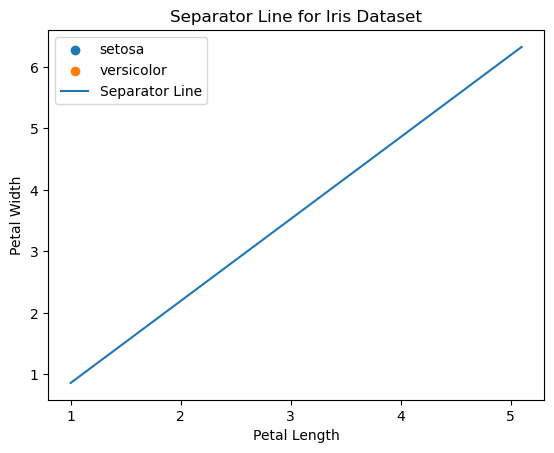

In [19]:
# Trained weights and bias
weights = np.array([0.27, 0.78, -1.04, -0.38])
bias = 0.1

plt.scatter(df[df['species'] == 'setosa']['petal_length'], 
            df[df['species'] == 'setosa']['petal_width'], 
            label='setosa')
plt.scatter(df[df['species'] == 'versicolor']['petal_length'], 
            df[df['species'] == 'versicolor']['petal_width'], 
            label='versicolor')

# Plotting separator line
x_values = np.linspace(df['petal_length'].min(), df['petal_length'].max(), 100)
y_values = -(bias + weights[2]*x_values + weights[0]) / weights[1]  # Assuming we use the first two features for the plot
plt.plot(x_values, y_values, label='Separator Line')


plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Separator Line for Iris Dataset')
plt.legend()
plt.show()